\begin{center}
Gabe Morris
\end{center}

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from scipy.optimize import fsolve

plt.style.use('maroon.mplstyle')

s, t = sp.symbols('s t')

display_latex = lambda text: display(Latex(text))

\pagebreak
\tableofcontents
\pagebreak

\begin{center}
\begin{tabular}{c c c}
ME 6643 & Homework 7 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 9.23
## Given
A certain factory contains a heavy rotating machine that causes the factory floor to vibrate. We want to operate another piece of equipment nearby, and we measure the amplitude of the floor’s motion at that point to be 0.01 m. The mass of the equipment is 1500 kg and its support has a stiffness of $k=2\cdot10^4\,\frac{N}{m}$ and a damping ratio of $\zeta=0.04$.

## Find
Calculate the maximum force that will be transmitted to the equipment at resonance.

## Solution
The free response of this system is,

$m\ddot{x}+c\dot{x}+kx=0$

We need to calculate $c$.

In [2]:
# Getting the damping constant using the damping ratio
zeta, m, k = 0.04, 1500, 2e4
c = 2*zeta*sp.sqrt(m*k)
c

438.178046004133

In [3]:
x = sp.Function('x')(t)
eq = sp.Eq(m*x.diff(t, 2) + c*x.diff(t) + k*x, 0)
eq

Eq(20000.0*x(t) + 438.178046004133*Derivative(x(t), t) + 1500*Derivative(x(t), (t, 2)), 0)

In [4]:
for root in sp.roots(m*s**2 + c*s + k):
    display_latex(f'${sp.latex(root)}$')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Resonance occurs when the excitation frequency is equivalent to the natural frequency of the system ($\omega=\omega_n=3.649\frac{rad}{s}$). The relationship for this system is described in section 9.3.5 in the book.

$\frac{F_t(s)}{Y(s)}=\frac{(cs+k)ms^2}{ms^2+cs+k}$

In [5]:
expr = (c*s + k)*m*s**2/(m*s**2 + c*s + k)
expr

s**2*(657267.069006199*s + 30000000.0)/(1500*s**2 + 438.178046004133*s + 20000.0)

In [6]:
expr_tw = expr.subs(s, sp.I*3.64856136031724)
expr_tw.expand()

-24958.000800964 + 249300.36011207*I

In [7]:
sp.Abs(expr_tw)*0.01

2505.46545288473

## Answer
$F_{max}=2500\,N$

\pagebreak

\begin{center}
\begin{tabular}{c c c}
ME 6643 & Homework 7 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 9.24
## Given
An electronics module inside an aircraft must be mounted on an elastic pad to protect it from vibration of the airframe. The largest amplitude vibration produced by the airframe’s motion has a frequency of 40 cycles per second. The module weighs 200 N, and its amplitude of motion is limited to 0.003 m because of space.

## Find
Neglect the damping and calculate the percent of the airframe's motion transmitted to the module.

## Solution

In [8]:
# Solving for stiffness k
# The stiffness of the spring may be calculated using the general F=kx relationship

k = sp.S(200/0.003)
k

66666.6666666667

Using the same information provided in section 9.3.5, except $c=0$.

$\frac{X(s)}{Y(s)}=\frac{k}{ms^2+k}$

In [9]:
expr = k/((200/9.8)*s**2 + k)
expr

66666.6666666667/(20.4081632653061*s**2 + 66666.6666666667)

In [10]:
expr_tw = expr.subs(s, sp.I*40*2*sp.pi)
expr_tw.expand()

66666.6666666667/(66666.6666666667 - 130612.244897959*pi**2)

In [11]:
sp.Abs(expr_tw).n()

0.0545364278557397

## Answer
5.5% gets transmitted to the module.

\pagebreak

\begin{center}
\begin{tabular}{c c c}
ME 6643 & Homework 7 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 9.36
## Given
The Fourier series approximation of $y(t)$ is,

$y(t)=\frac{1}{20\pi}[\pi-2(\frac{\sin(10\pi t)}{1}+\frac{\sin(20\pi t)}{2}+\frac{\sin(30\pi t)}{3}\cdots)]$

In [12]:
N = 3
sin_funcs = [sp.sin(A_*sp.pi*t)/(i + 1) for i, A_ in enumerate(range(10, 10*(N+1), 10))]
y_t = 1/(20*sp.pi)*(sp.pi - 2*sum(sin_funcs))
y_t

(-2*sin(10*pi*t) - sin(20*pi*t) - 2*sin(30*pi*t)/3 + pi)/(20*pi)

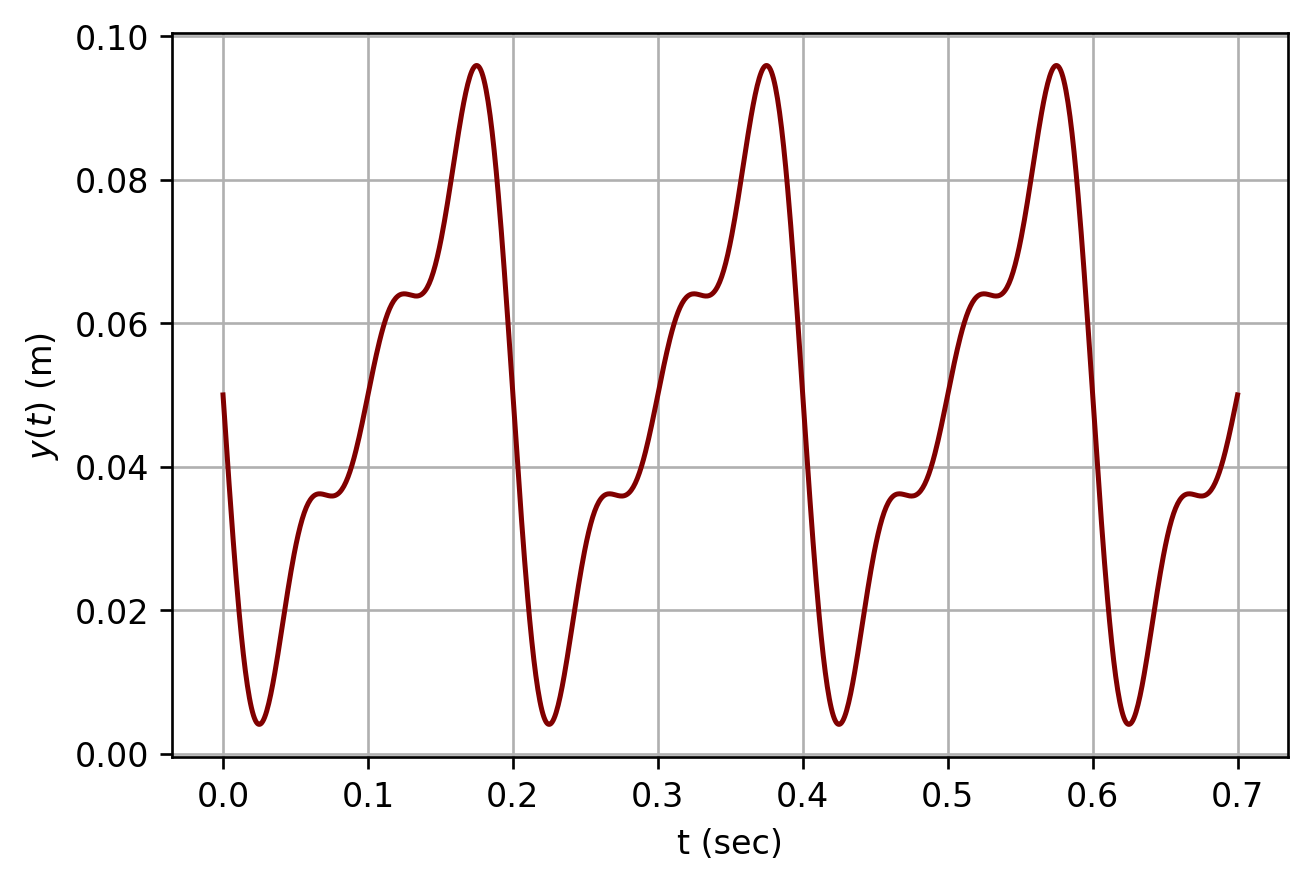

In [13]:
y_t_lamb = sp.lambdify(t, y_t, modules='numpy')
time = np.linspace(0, 0.7, 1000)
plt.plot(time, y_t_lamb(time))
plt.xlabel('t (sec)')
plt.ylabel('$y(t)$ (m)')
plt.show()

The system is arranged like so,

\begin{center}
\includegraphics{images/Capture}
\end{center}

## Find
For the values $m=1\,kg$, $c=98\,N\cdot s/m$, and $k=4900\,N/m$, keeping only those terms in the Fourier series whose frequencies lie within the system's bandwidth, obtain the expression for the steady-state displacement $x(t)$.

## Solution
The force balance of the system is,

$m\ddot{x}=k(y-x)+c(\dot{y}-\dot{x})$ \
$m\ddot{x}+c\dot{x}+kx=c\dot{y}+ky$

In [14]:
# Putting it into the s domain
X, Y = sp.Function('X')(s), sp.Function('Y')(s)
m, k, c = 1, 4900, 98
eq = sp.Eq(m*s**2*X + c*s*X + k*X, c*s*Y + k*Y)
eq

Eq(s**2*X(s) + 98*s*X(s) + 4900*X(s), 98*s*Y(s) + 4900*Y(s))

In [15]:
T_s = sp.solve(eq, X)[0]/Y
T_s

98*(s + 50)/(s**2 + 98*s + 4900)

In [16]:
# Getting the magnitude
w = sp.Symbol(r'\omega')
T_jw = T_s.subs(s, sp.I*w)
T_jw

98*(I*\omega + 50)/(-\omega**2 + 98*I*\omega + 4900)

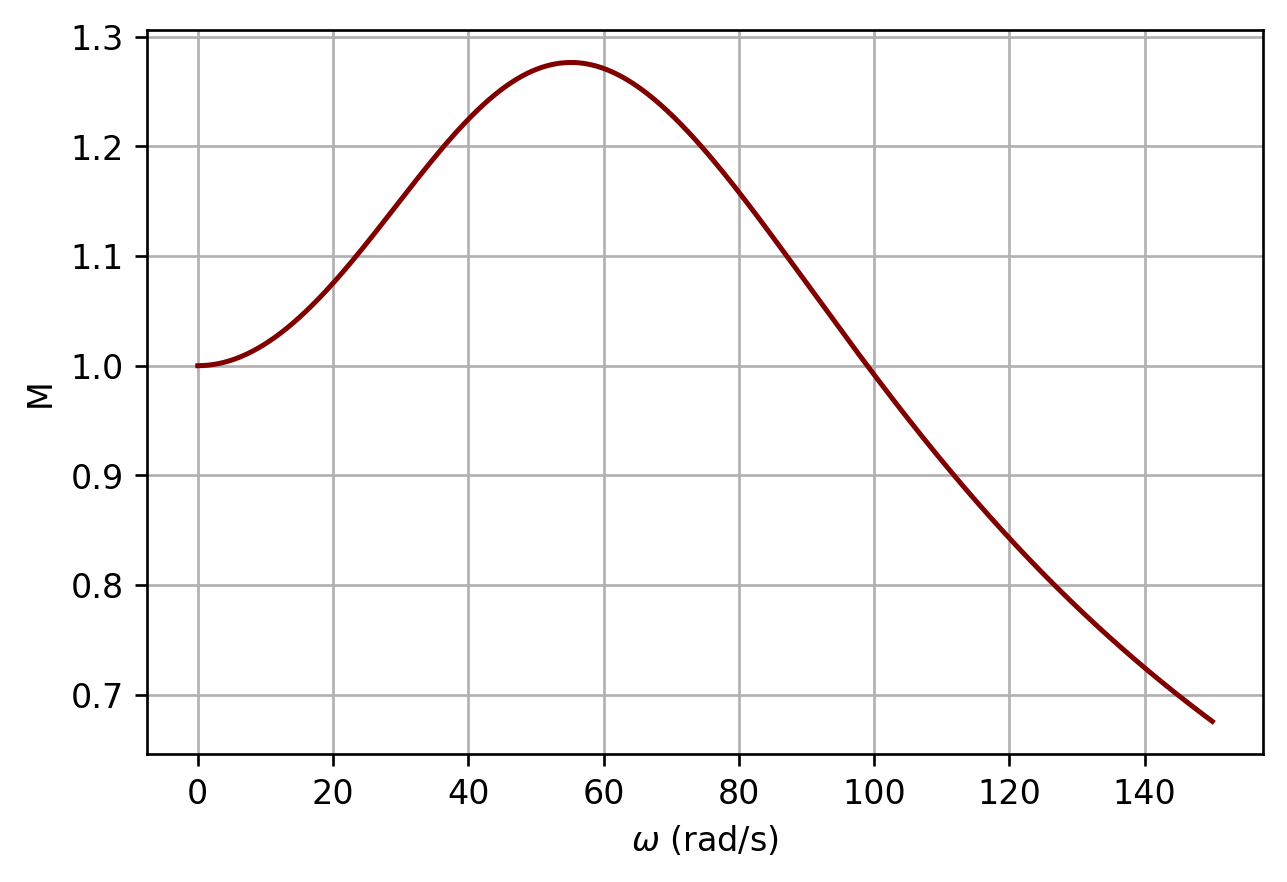

In [17]:
M = sp.Abs(T_jw)
phi = sp.arg(T_jw)
M_lamb = sp.lambdify(w, M, modules='numpy')
phi_lamb = sp.lambdify(w, phi, modules='numpy')
omegas = np.linspace(0, 150, 1000)
plt.plot(omegas, M_lamb(omegas))
plt.xlabel(r'$\omega$ (rad/s)')
plt.ylabel(r'M')
plt.show()

In [18]:
# Where is this max?
M_num = M_lamb(omegas)
M_peak = np.max(M_num)
omegas[M_num == M_peak][0], M_peak

(55.25525525525526, 1.2764412583290632)

In [19]:
M_band = M_peak/np.sqrt(2)
M_band

0.9025802695507702

The lower bandwidth frequency is zero because $M(0)$ is greater than 0.9026.

In [20]:
# Finding the upper bandwidth frequency
fsolve(lambda x_: M_lamb(x_) - M_band, np.array([100, ]))[0]

111.4664111879066

The upper bandwidth frequency is $111.5\,\frac{rad}{s}$. The Fourier series up to $N=3$ is valid because $30\pi\,\frac{rad}{s}=94.2\,\frac{rad}{s}<111.5\,\frac{rad}{s}$.

## Answer

In [21]:
sin_terms = [M.subs(w, w_).n(3)*sp.sin(w_.n(3)*t + phi.subs(w, w_).n(3))/w_.n(3) for w_ in [sp.pi*10, sp.pi*20, sp.pi*30]]
sp.Eq(sp.Symbol('x_{ss}'), 1/20 - sum(sin_terms))

Eq(x_{ss}, -0.037*sin(31.4*t - 0.106) - 0.0201*sin(62.8*t - 0.519) - 0.011*sin(94.3*t - 0.895) + 0.05)

### Note
Note that the angle operation must be utilized here because solving for the angles using $\arctan$ is only valid for vectors in the first and fourth quadrant. The correct solution is shown above and is,

In [22]:
# Correct solution
o = np.arange(0, 31*np.pi, 10*np.pi)
c_nums = (k + 1j*c*o)/(-o**2 + c*1j*o + k)
np.angle(c_nums)

array([ 0.        , -0.10565511, -0.51874099, -0.89486832])

The incorrect solution would involve using $\arctan$,

In [23]:
np.arctan(c*o/k) - np.arctan(c*o/(k - o**2))

array([ 0.        , -0.10565511, -0.51874099,  2.24672433])

The last value (corresponding to $\omega=30\pi$) is incorrect because the second term in the above expression is a vector that is in the second quadrant, a region for which the $\arctan$ function does not return the appropriate angle.